In [2]:
import numpy as np

from qiskit import Aer, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

We estimate the phase of the phase gate $P(\phi) = \begin{pmatrix}
1 & 0 \\
0 & e^{i \phi}
\end{pmatrix}$ with $\lambda = 2 \pi /3$.
QPE gives us the phase $U |\psi \rangle = e^{2 \pi i \theta} |\psi \rangle$. For $U = P(\lambda)$, with $\lambda = 2 \pi / 3$, we expect $\theta = 1/3 = 0.333 \ldots$.

In [3]:
def get_QPE_circ(ancillas, system_qubits):
    anc_reg = QuantumRegister(ancillas, "anc")
    sys_reg = QuantumRegister(system_qubits, "sys")
    creg = ClassicalRegister(ancillas, "c")

    qpe_circ = QuantumCircuit(
        anc_reg, sys_reg, # quantum bits
        creg # classical bits
    )

    # initialize system
    qpe_circ.x(-1)
    qpe_circ.barrier()

    # initialize ancillas in equal superposition
    qpe_circ.h(range(ancillas))
    qpe_circ.barrier()

    # controlled unitaries
    angle = 2*np.pi/3
    reps = 1
    for a in range(ancillas):
        for _ in range(reps):
            qpe_circ.cp(angle, anc_reg[a], sys_reg[0])
        reps *= 2
        qpe_circ.barrier()

    # inverse Quantum Fourier transform
    qpe_circ.append(QFT(ancillas, inverse=True), anc_reg)

    return qpe_circ

In [4]:
ancillas = 3
system_qubits = 1

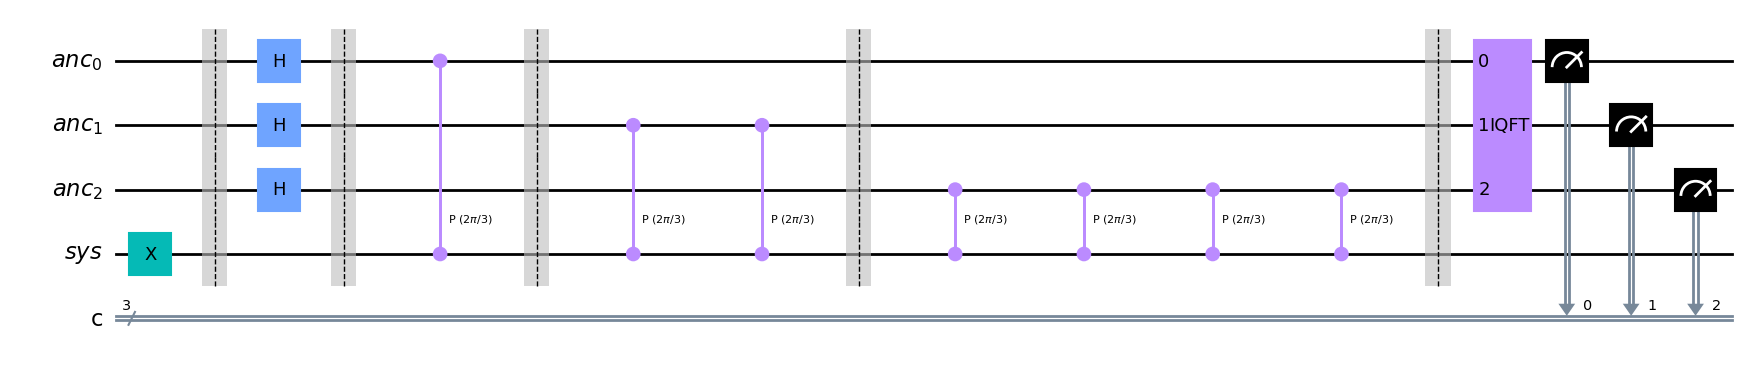

In [5]:
qc = get_QPE_circ(ancillas, system_qubits)

qc.measure(range(ancillas), range(ancillas))

qc.draw("mpl", fold=False)

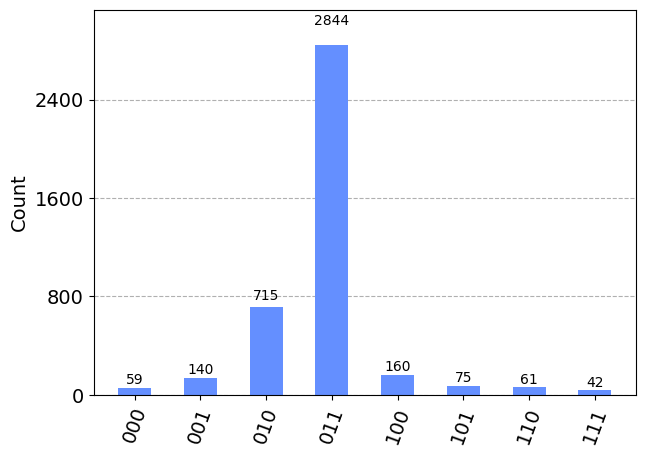

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qc = transpile(qc, aer_sim)
results = aer_sim.run(t_qc, shots=shots).result()
counts = results.get_counts()

plot_histogram(counts)

We are most likely to measure $010$ or $011$, \
corresponding to \
$0.010_{\rm bin} = 1/4 = 0.25_{\rm hex}$ and \
$0.011_{\rm bin} = 1/4 + 1/8 = 0.375_{\rm hex}$.

We can get better accuracy by adding more ancillas

In [7]:
ancillas = 5
system_qubits = 1

In [8]:
qc = get_QPE_circ(ancillas, system_qubits)

qc.measure(range(ancillas), range(ancillas))

qc.draw()

░ ┌───┐ ░            ░                      ░                     »
anc_0: ──────░─┤ H ├─░──■─────────░──────────────────────░─────────────────────»
             ░ ├───┤ ░  │         ░                      ░                     »
anc_1: ──────░─┤ H ├─░──┼─────────░──■─────────■─────────░─────────────────────»
             ░ ├───┤ ░  │         ░  │         │         ░                     »
anc_2: ──────░─┤ H ├─░──┼─────────░──┼─────────┼─────────░──■─────────■────────»
             ░ ├───┤ ░  │         ░  │         │         ░  │         │        »
anc_3: ──────░─┤ H ├─░──┼─────────░──┼─────────┼─────────░──┼─────────┼────────»
             ░ ├───┤ ░  │         ░  │         │         ░  │         │        »
anc_4: ──────░─┤ H ├─░──┼─────────░──┼─────────┼─────────░──┼─────────┼────────»
       ┌───┐ ░ └───┘ ░  │P(2π/3)  ░  │P(2π/3)  │P(2π/3)  ░  │P(2π/3)  │P(2π/3) »
  sys: ┤ X ├─░───────░──■─────────░──■─────────■─────────░──■─────────■────────»
       └───┘ ░       ░            ░                      ░                     »
  c: 5/════════════════════════════════════════════════════════════════════════»
                                                                               »
«                            ░                                         »
«anc_0: ─────────────────────░─────────────────────────────────────────»
«                            ░                                         »
«anc_1: ─────────────────────░─────────────────────────────────────────»
«                            ░                                         »
«anc_2: ─■─────────■─────────░─────────────────────────────────────────»
«        │         │         ░                                         »
«anc_3: ─┼─────────┼─────────░──■─────────■─────────■─────────■────────»
«        │         │         ░  │         │         │         │        »
«anc_4: ─┼─────────┼─────────░──┼─────────┼─────────┼─────────┼────────»
«        │P(2π/3)  │P(2π/3)  ░  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
«  sys: ─■─────────■─────────░──■─────────■─────────■─────────■────────»
«                            ░                                         »
«  c: 5/═══════════════════════════════════════════════════════════════»
«                                                                      »
«                                                ░                     »
«anc_0: ─────────────────────────────────────────░─────────────────────»
«                                                ░                     »
«anc_1: ─────────────────────────────────────────░─────────────────────»
«                                                ░                     »
«anc_2: ─────────────────────────────────────────░─────────────────────»
«                                                ░                     »
«anc_3: ─■─────────■─────────■─────────■─────────░─────────────────────»
«        │         │         │         │         ░                     »
«anc_4: ─┼─────────┼─────────┼─────────┼─────────░──■─────────■────────»
«        │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  ░  │P(2π/3)  │P(2π/3) »
«  sys: ─■─────────■─────────■─────────■─────────░──■─────────■────────»
«                                                ░                     »
«  c: 5/═══════════════════════════════════════════════════════════════»
«                                                                      »
«                                                                             »
«anc_0: ──────────────────────────────────────────────────────────────────────»
«                                                                             »
«anc_1: ──────────────────────────────────────────────────────────────────────»
«                                                                             »
«anc_2: ──────────────────────────────────────────────────────────────────────»
«                                                                             »
«anc_3: ────────────────────────────────────────

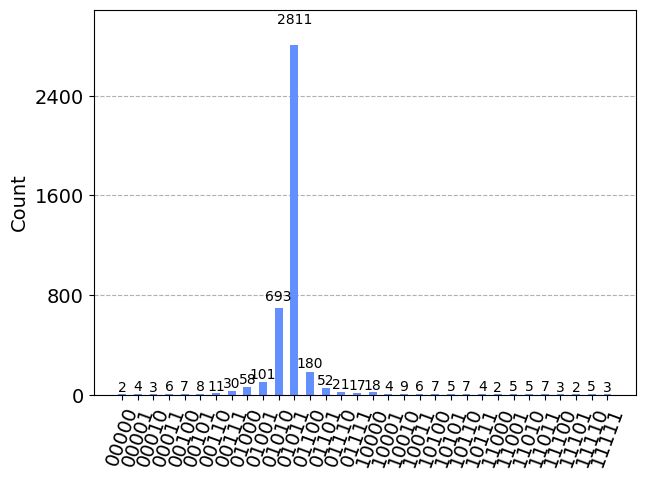

In [9]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qc = transpile(qc, aer_sim)
results = aer_sim.run(t_qc, shots=shots).result()
counts = results.get_counts()

plot_histogram(counts)

We are most likely to measure $01011$ and $01010$,
corresponding to \
$0.01011_{\rm bin} = 1/4 + 1/16 + 1/32 = 0.34375_{\rm hex}$ and \
$0.01010_{\rm bin} = 1/4 + 1/16 = 0.3125_{\rm hex}$.